# PRE PROCESSING

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
link='https://drive.google.com/file/d/1UZ_H96BS14SfJUfvhjx1dD9tUbnmi1BG/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

<ipython-input-3-8dffd7d4c8a4>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


## Correct columns dataset

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
#check the statistical values
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
#drop the column which is out of model scope
d_col = ['Name','SSN',
         'Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly','Type_of_Loan','Num_of_Delayed_Payment']
df = df.drop(d_col , axis=1).copy()
df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,11.27,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,11.27,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,_,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,5,6.27,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,11.27,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,11.5,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,11.5,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,11.5,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,11.5,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
#check unique categorical data
categorical_cols = [c for c in df.columns if df[c].dtype == 'object']
for col in categorical_cols:
    print(f"Unique Values of {col}")
    print(df[col].unique())
    print("==================================================")

Unique Values of ID
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Unique Values of Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique Values of Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Unique Values of Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Num_of_Loan
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'

In [ ]:
#there are weird values in age and payment behavior, with _ in front/ back
for col in categorical_cols:
    df[col] = df[col].str.strip('_')

    try:
        df[col] = df[col].astype('float64')
    except:
        df[col] = df[col]


for col in categorical_cols:
    df[col] = df[col].replace({'':np.nan})

    try:
        df[col] = df[col].astype('float64')
    except:
        df[col] = df[col]
for col in categorical_cols:
    df[col] = df[col].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan})

In [ ]:
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Customer_ID            100000 non-null  object 
 2   Month                  100000 non-null  object 
 3   Age                    100000 non-null  float64
 4   Occupation             92938 non-null   object 
 5   Annual_Income          100000 non-null  float64
 6   Num_of_Loan            100000 non-null  float64
 7   Changed_Credit_Limit   97909 non-null   float64
 8   Outstanding_Debt       100000 non-null  float64
 9   Credit_History_Age     90970 non-null   object 
 10  Payment_of_Min_Amount  100000 non-null  object 
 11  Payment_Behaviour      92400 non-null   object 
 12  Monthly_Balance        97132 non-null   float64
 13  Credit_Score           100000 non-null  object 
dtypes: float64(6), object(8)
memory usage

In [ ]:
#Get Customer_ID
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

In [ ]:
#Change Month
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

In [ ]:
#Convert credit history age into months
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x
df['Credit_History_Age']=df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [ ]:
#Change NM to No, NM is mislablled
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].str.replace("M","o")
df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
#convert ayment behavior to binary values
df = df.replace({'Payment_Behaviour' : { 'Uncategorized' : 0, 'Low_spent_Small_value_payments' : 1,
                              'Low_spent_Medium_value_payments' : 2 , "Low_spent_Large_value_payments":3,
                              "High_spent_Small_value_payments":4,"High_spent_Medium_value_payments":5,
                             "High_spent_Large_value_payments":6}})

In [ ]:
#convert credit score to binary values
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

## Handling Outliers

In [ ]:
#handling outliers -> change to NaN first
numerical_cols = [col for col in df.columns if (df[col].dtype == 'int64') | (df[col].dtype == 'float64')]

for x in list(numerical_cols):
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

## Handling missing values

In [ ]:
#replace with mean, bien lien tuc
df['Age'].replace(np.nan, "%.3f" % df['Age'].astype('float').mean(axis=0), inplace=True)
df['Annual_Income'].replace(np.nan, "%.3f" % df['Annual_Income'].astype('float').mean(axis=0), inplace=True)
df['Monthly_Inhand_Salary'].replace(np.nan, "%.3f" % df['Monthly_Inhand_Salary'].astype('float').mean(axis=0), inplace=True)
df['Interest_Rate'].replace(np.nan, "%.3f" % df['Interest_Rate'].astype('float').mean(axis=0), inplace=True)
df['Total_EMI_per_month'].replace(np.nan, "%.3f" % df['Total_EMI_per_month'].astype('float').mean(axis=0), inplace=True)
df['Monthly_Balance'].replace(np.nan, "%.3f" % df['Monthly_Balance'].astype('float').mean(axis=0), inplace=True)

In [ ]:
#replace with most appear value
df['Num_Bank_Accounts'].replace(np.nan, "%.3f" % df['Num_Bank_Accounts'].astype('float').idxmax(axis=0), inplace=True)
df['Num_Credit_Card'].replace(np.nan, "%.3f" % df['Num_Credit_Card'].astype('float').idxmax(axis=0), inplace=True)
df['Num_of_Loan'].replace(np.nan, "%.3f" % df['Num_of_Loan'].astype('float').idxmax(axis=0), inplace=True)
df['Delay_from_due_date'].replace(np.nan, "%.3f" % df['Delay_from_due_date'].astype('float').idxmax(axis=0), inplace=True)
df['Changed_Credit_Limit'].replace(np.nan, "%.3f" % df['Changed_Credit_Limit'].astype('float').idxmax(axis=0), inplace=True)
df['Outstanding_Debt'].replace(np.nan, "%.3f" % df['Outstanding_Debt'].astype('float').idxmax(axis=0), inplace=True)
df['Credit_History_Age'].replace(np.nan, "%.3f" % df['Credit_History_Age'].astype('float').idxmax(axis=0), inplace=True)
df['Payment_Behaviour'].replace(np.nan, "%.3f" % df['Payment_Behaviour'].astype('float').idxmax(axis=0), inplace=True)

In [ ]:
#fill occupation ( not numeric)
df['Occupation'] = df['Occupation'].fillna(method='bfill')

In [ ]:
df.isna().sum()

ID                       0
Customer_ID              0
Month                    0
Age                      0
Occupation               0
Annual_Income            0
Monthly_Inhand_Salary    0
Num_Bank_Accounts        0
Num_Credit_Card          0
Interest_Rate            0
Num_of_Loan              0
Delay_from_due_date      0
Changed_Credit_Limit     0
Outstanding_Debt         0
Credit_History_Age       0
Payment_of_Min_Amount    0
Total_EMI_per_month      0
Payment_Behaviour        0
Monthly_Balance          0
Credit_Score             0
dtype: int64

In [ ]:
df.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,3392.0,1.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,11.27,809.98,265.0,No,49.574949,4.0,312.494089,Good
1,0x1603,3392.0,2.0,23.0,Scientist,19114.12,4194.171,3.0,4.0,3.0,4.0,-1.0,11.27,809.98,775.000,No,49.574949,3.0,284.629162,Good
2,0x1604,3392.0,3.0,33.320,Scientist,19114.12,4194.171,3.0,4.0,3.0,4.0,3.0,21807.000,809.98,267.0,No,49.574949,2.0,331.209863,Good
3,0x1605,3392.0,4.0,23.0,Scientist,19114.12,4194.171,3.0,4.0,3.0,4.0,5.0,6.27,809.98,268.0,No,49.574949,1.0,223.45131,Good
4,0x1606,3392.0,5.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,11.27,809.98,269.0,No,49.574949,5.0,341.489231,Good


## RECHECK

In [ ]:
df.dtypes

ID                        object
Customer_ID              float64
Month                    float64
Age                       object
Occupation                object
Annual_Income             object
Monthly_Inhand_Salary     object
Num_Bank_Accounts         object
Num_Credit_Card           object
Interest_Rate             object
Num_of_Loan               object
Delay_from_due_date       object
Changed_Credit_Limit      object
Outstanding_Debt          object
Credit_History_Age        object
Payment_of_Min_Amount     object
Total_EMI_per_month       object
Payment_Behaviour         object
Monthly_Balance           object
Credit_Score              object
dtype: object

In [ ]:
df[["Age","Annual_Income","Monthly_Inhand_Salary","Num_Bank_Accounts",
    "Num_Credit_Card","Interest_Rate","Num_of_Loan","Delay_from_due_date",
    "Changed_Credit_Limit","Credit_History_Age",
    "Total_EMI_per_month","Payment_Behaviour","Monthly_Balance"]] = df[["Age","Annual_Income","Monthly_Inhand_Salary","Num_Bank_Accounts",
    "Num_Credit_Card","Interest_Rate","Num_of_Loan","Delay_from_due_date",
    "Changed_Credit_Limit","Credit_History_Age",
    "Total_EMI_per_month","Payment_Behaviour","Monthly_Balance"]].astype("float")

In [ ]:
df.describe()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Credit_History_Age,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,1.000000e+05
mean,25982.666640,4.500000,33.320009,48346.570877,4194.170872,1010.535640,28.163080,14.531611,19.380750,33.462920,466.156161,271.203960,89.861132,3.68296,-3.088580e+22
std,14340.543051,2.291299,10.618749,34660.930620,2935.176493,8707.701796,148.465797,8.650407,74.366328,69.664888,3118.749375,185.052315,79.917894,2.34065,3.162147e+24
min,1006.000000,1.000000,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-6.490000,1.000000,0.000000,1.00000,-3.333333e+26
25%,13664.500000,2.750000,25.000000,19457.500000,1792.084167,3.000000,4.000000,8.000000,2.000000,10.000000,5.420000,154.000000,30.306660,1.00000,2.645521e+02
50%,25777.000000,4.500000,33.320000,37578.610000,3852.736667,6.000000,5.000000,13.000000,3.000000,18.000000,9.560000,231.000000,69.249473,4.00000,3.319282e+02
75%,38385.000000,6.250000,41.000000,68655.405000,5371.525000,7.000000,7.000000,20.000000,6.000000,28.000000,15.360000,333.000000,124.867635,5.00000,4.635022e+02
max,50999.000000,8.000000,56.000000,152574.760000,15204.633333,76444.000000,1002.000000,34.000000,368.000000,369.000000,21807.000000,775.000000,357.406068,9.00000,1.602041e+03


In [ ]:
df.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,3392.0,1.0,23.00,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,11.27,809.98,265.0,No,49.574949,4.0,312.494089,Good
1,0x1603,3392.0,2.0,23.00,Scientist,19114.12,4194.171000,3.0,4.0,3.0,4.0,-1.0,11.27,809.98,775.0,No,49.574949,3.0,284.629162,Good
2,0x1604,3392.0,3.0,33.32,Scientist,19114.12,4194.171000,3.0,4.0,3.0,4.0,3.0,21807.00,809.98,267.0,No,49.574949,2.0,331.209863,Good
3,0x1605,3392.0,4.0,23.00,Scientist,19114.12,4194.171000,3.0,4.0,3.0,4.0,5.0,6.27,809.98,268.0,No,49.574949,1.0,223.451310,Good
4,0x1606,3392.0,5.0,23.00,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,11.27,809.98,269.0,No,49.574949,5.0,341.489231,Good


## EDA

<Axes: >

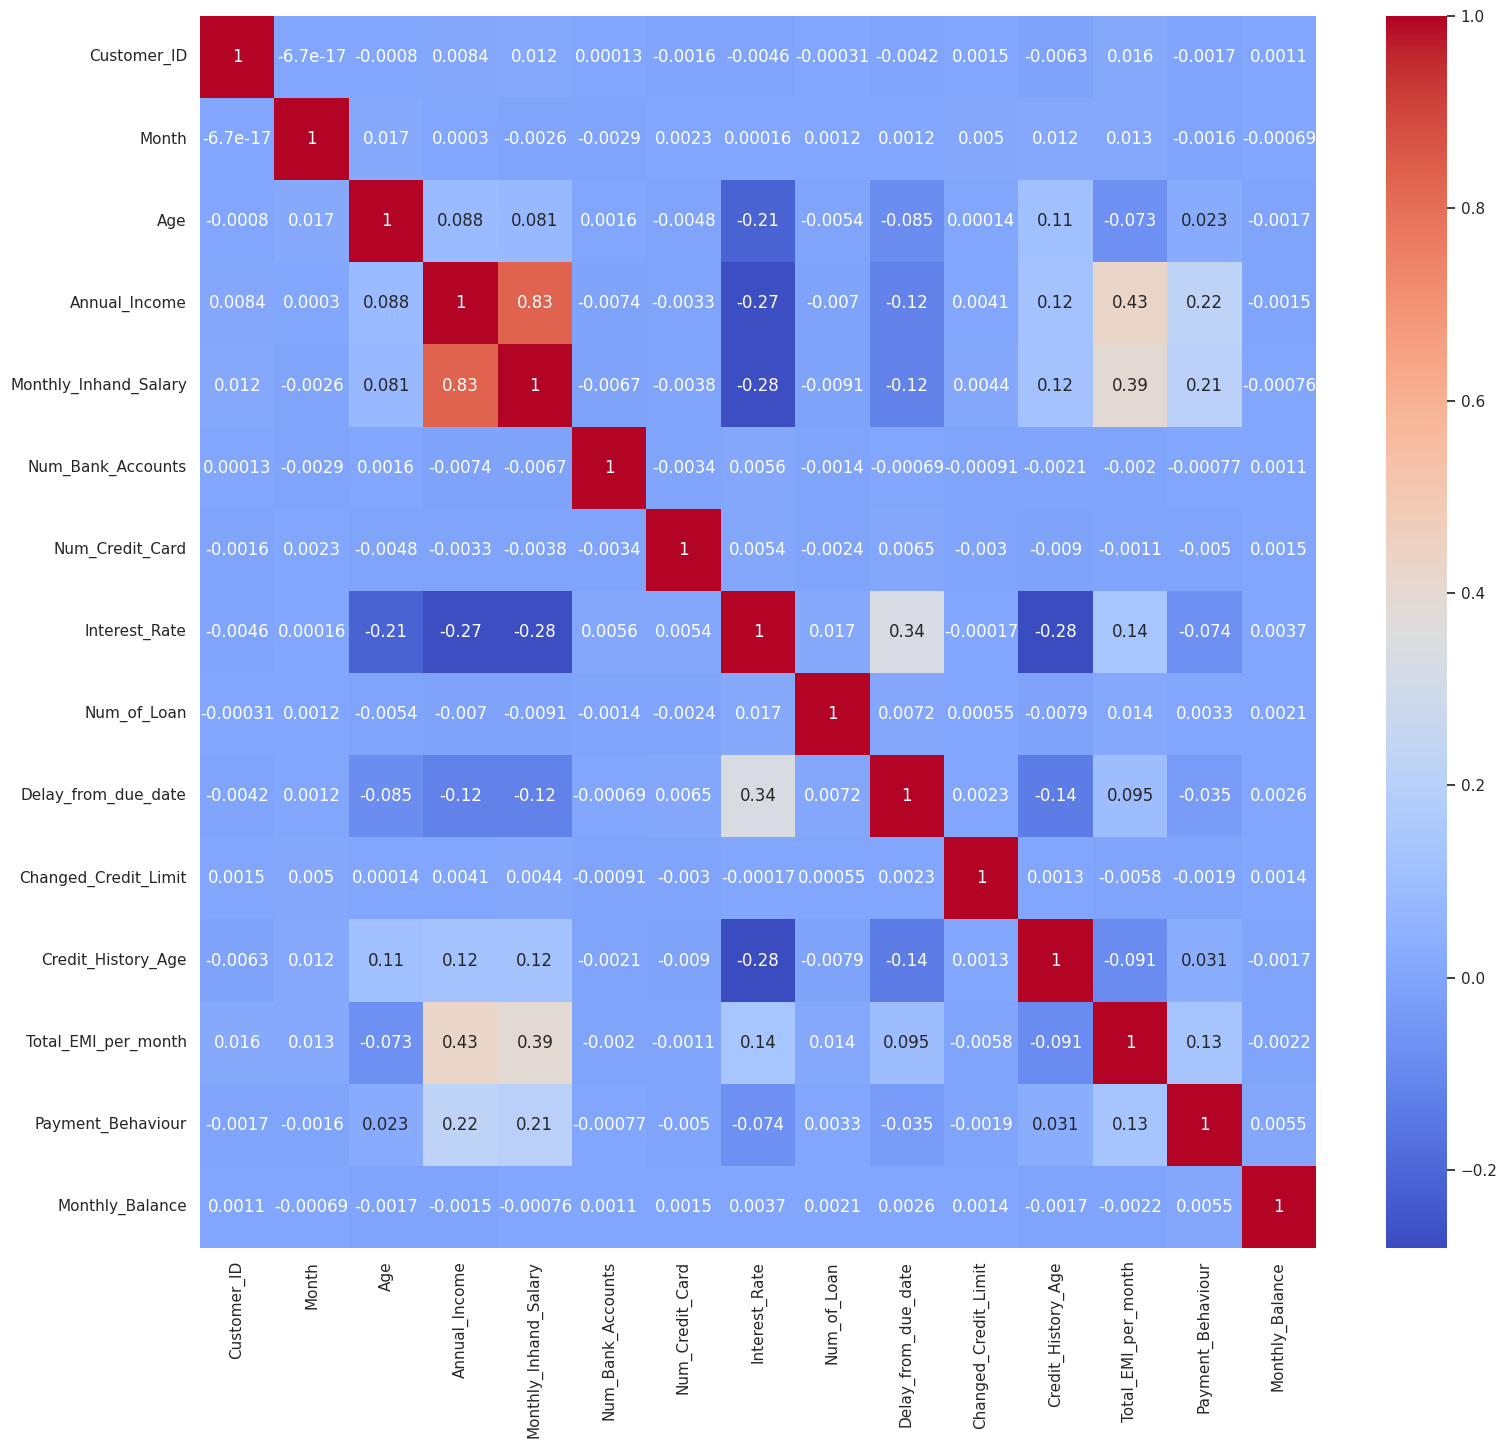

In [ ]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: ylabel='Credit_Score'>

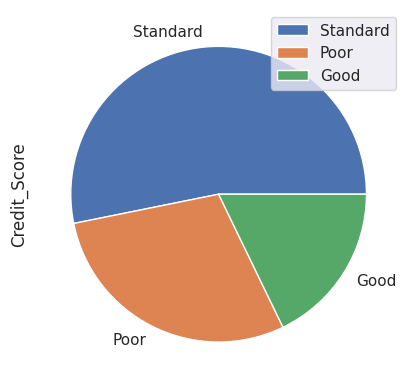

In [ ]:
df['Credit_Score'].value_counts().plot.pie(legend = ["0", "1"])

<Axes: xlabel='Credit_Score', ylabel='count'>

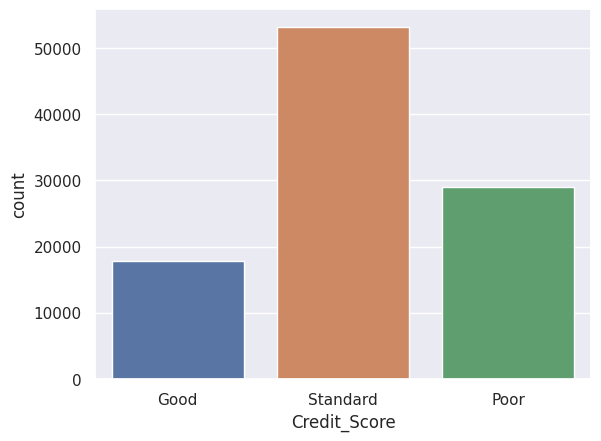

In [ ]:
sns.countplot(x=df['Credit_Score'])

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

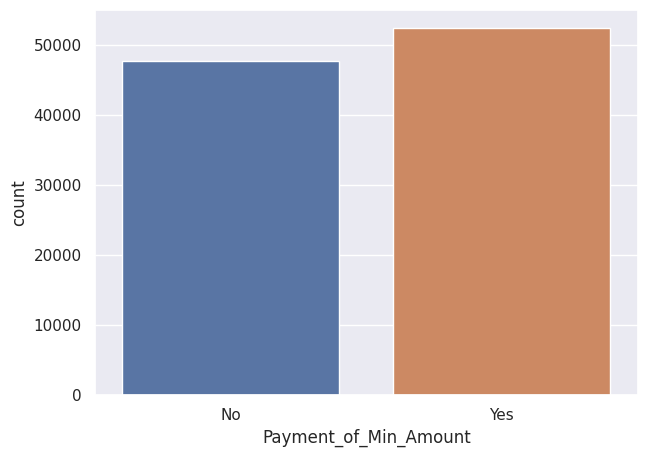

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=df,x="Payment_of_Min_Amount")

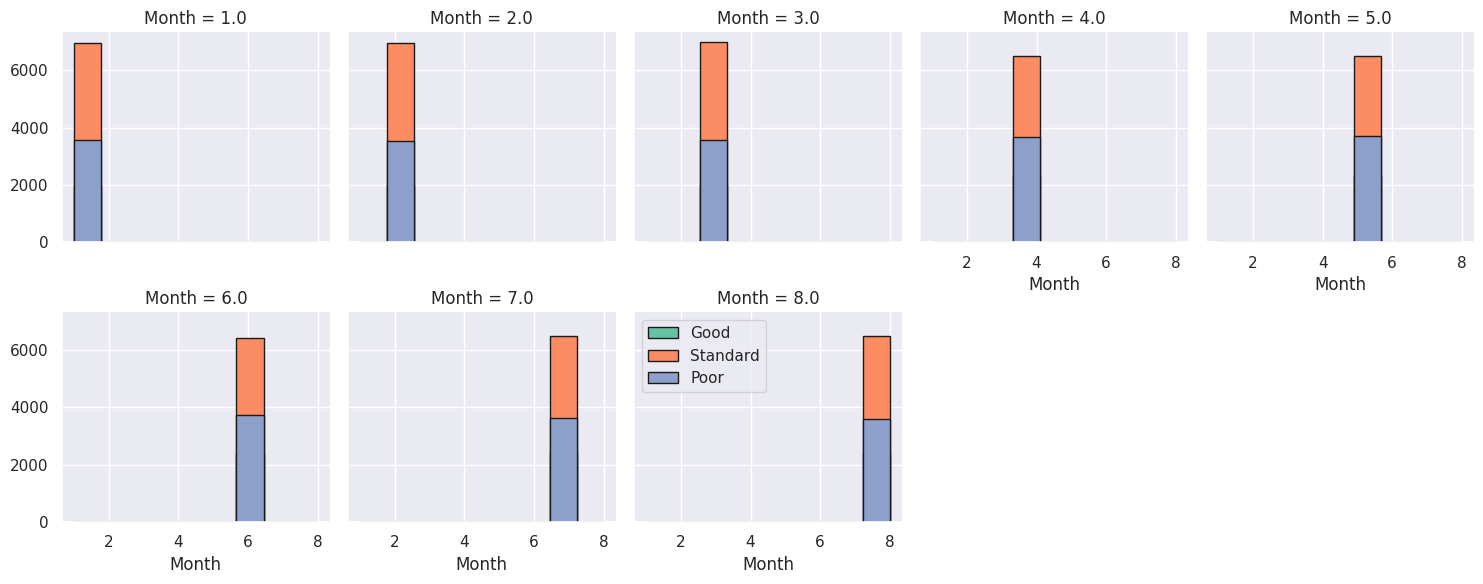

In [ ]:
#2 variables
bins = np.linspace(df.Month.min(), df.Month.max(), 10)
g = sns.FacetGrid(df, col="Month", hue="Credit_Score", palette="Set2", col_wrap=5)
g.map(plt.hist, 'Month', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

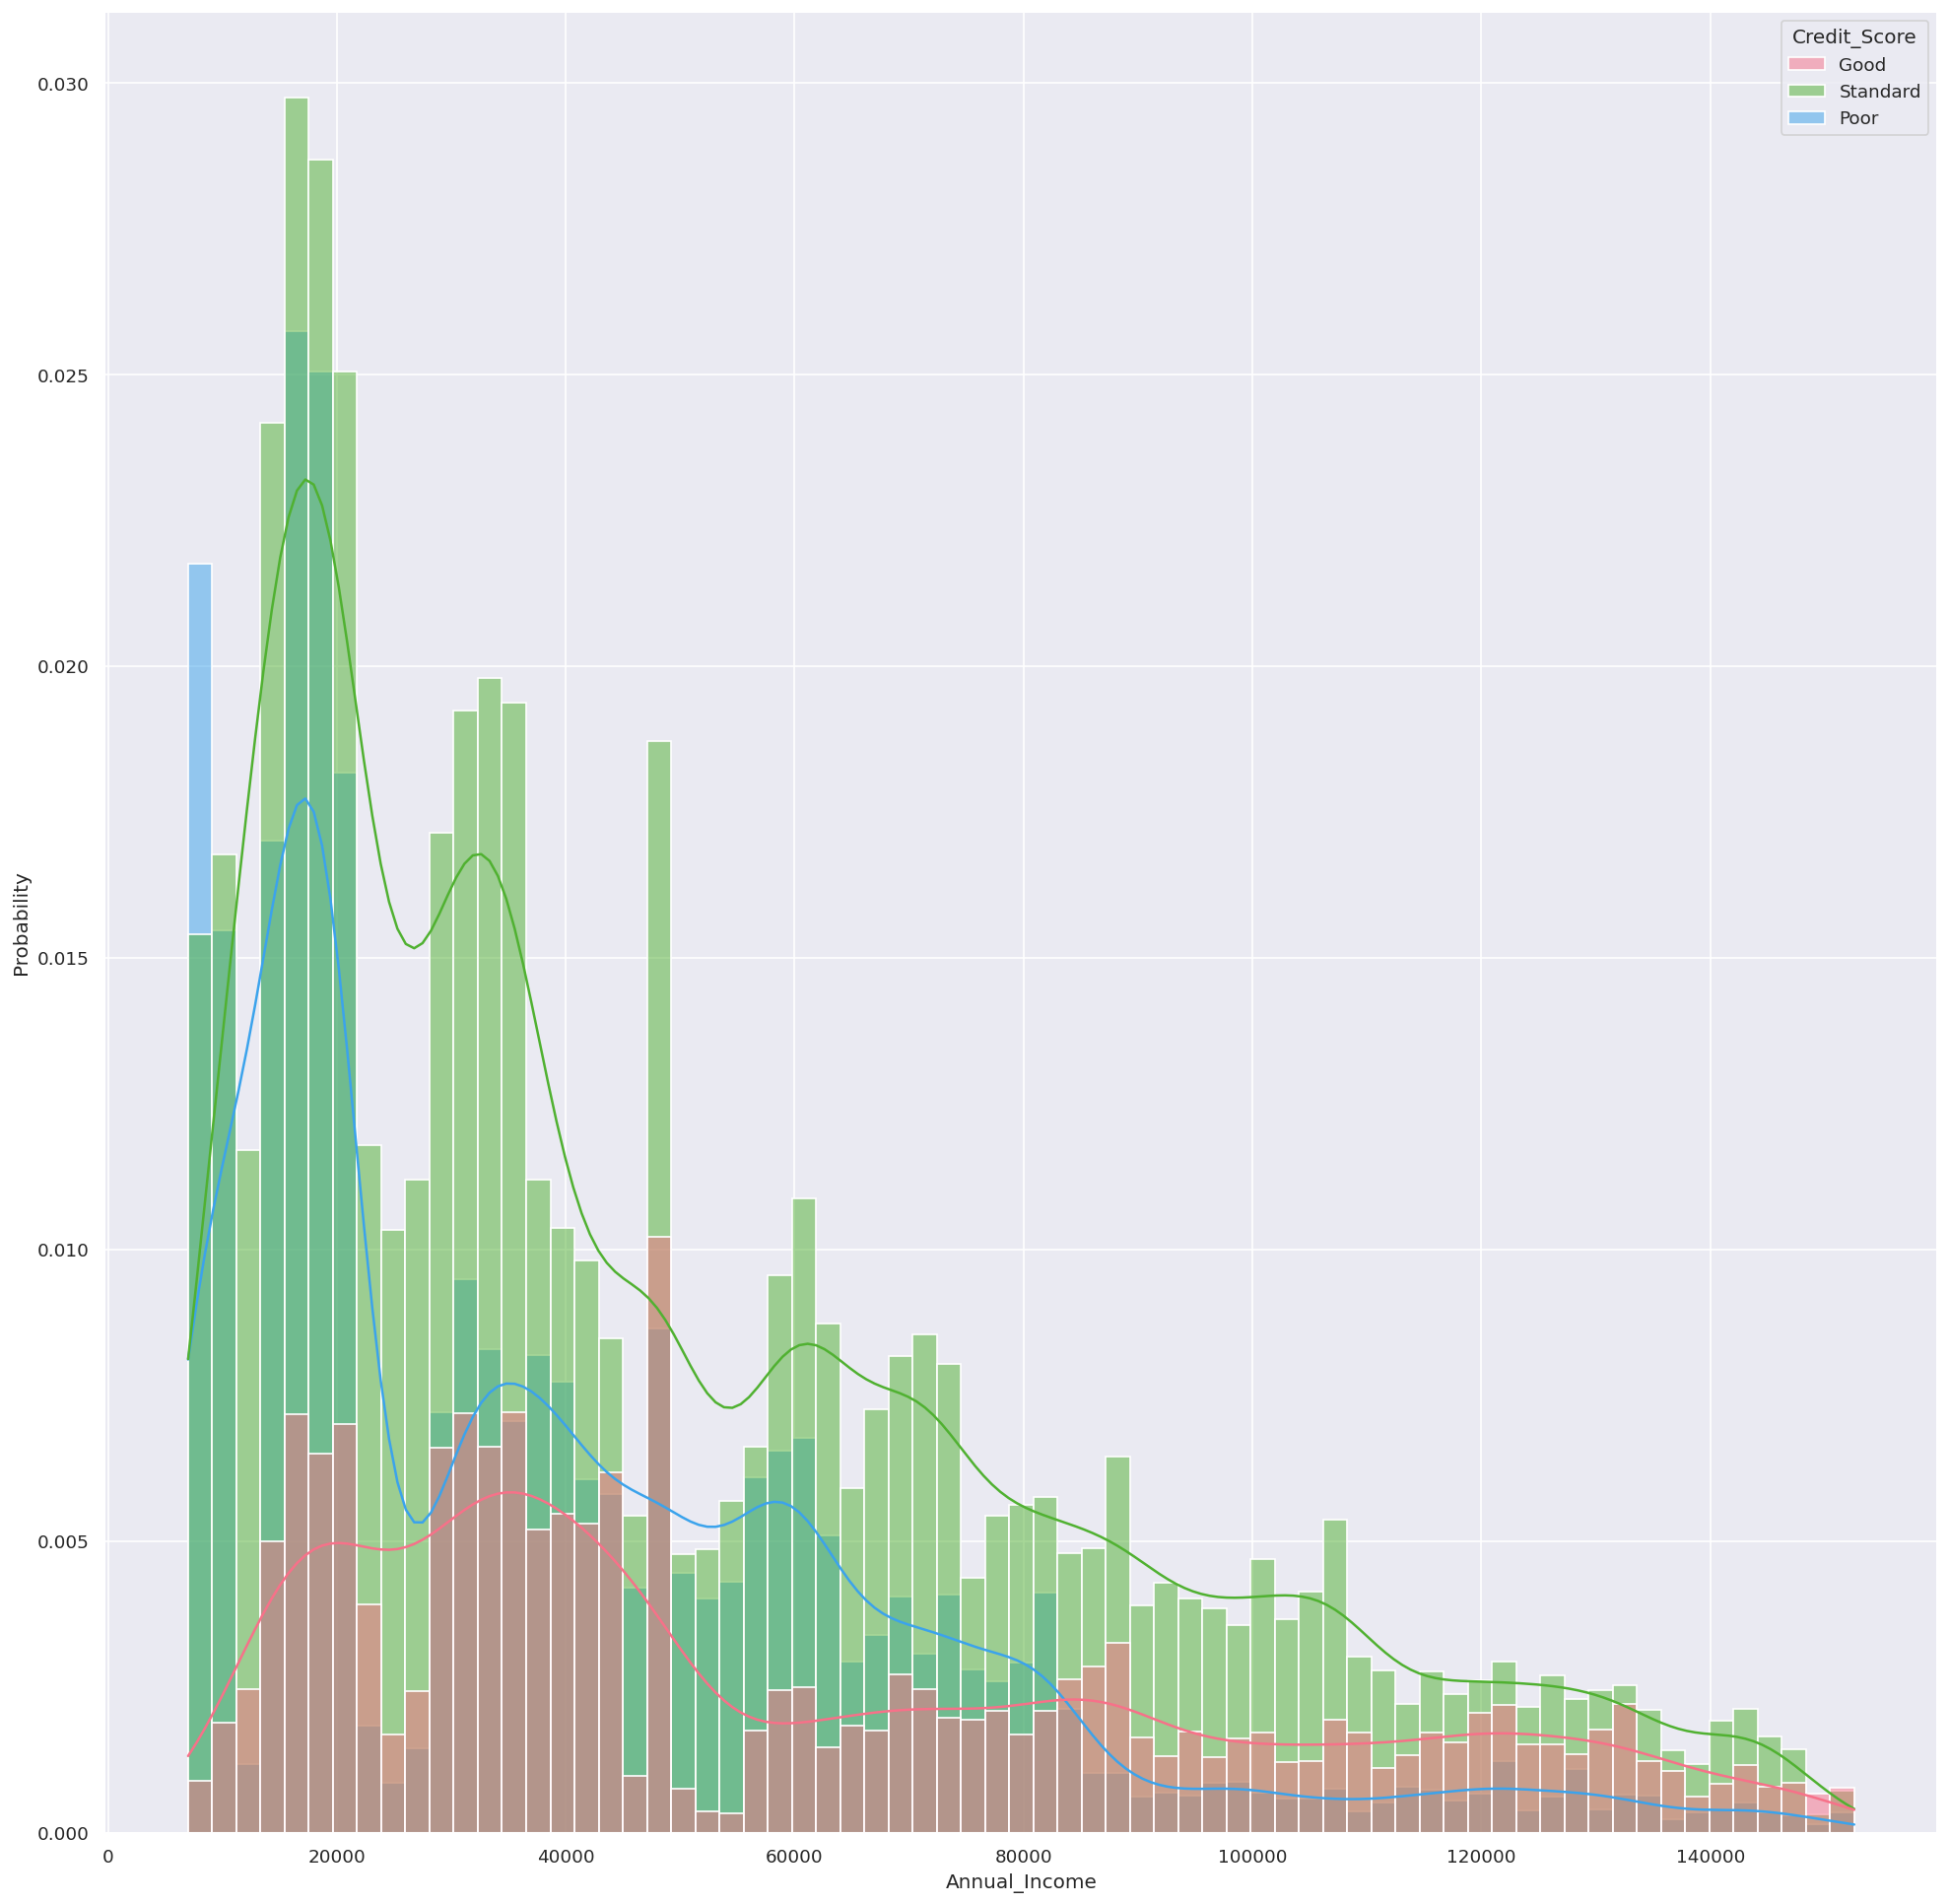

In [ ]:
plt.figure(figsize = (20,20))
sns.histplot(data = df, x = 'Annual_Income', hue = 'Credit_Score', kde = True, stat = 'probability', palette = 'husl')
plt.show()

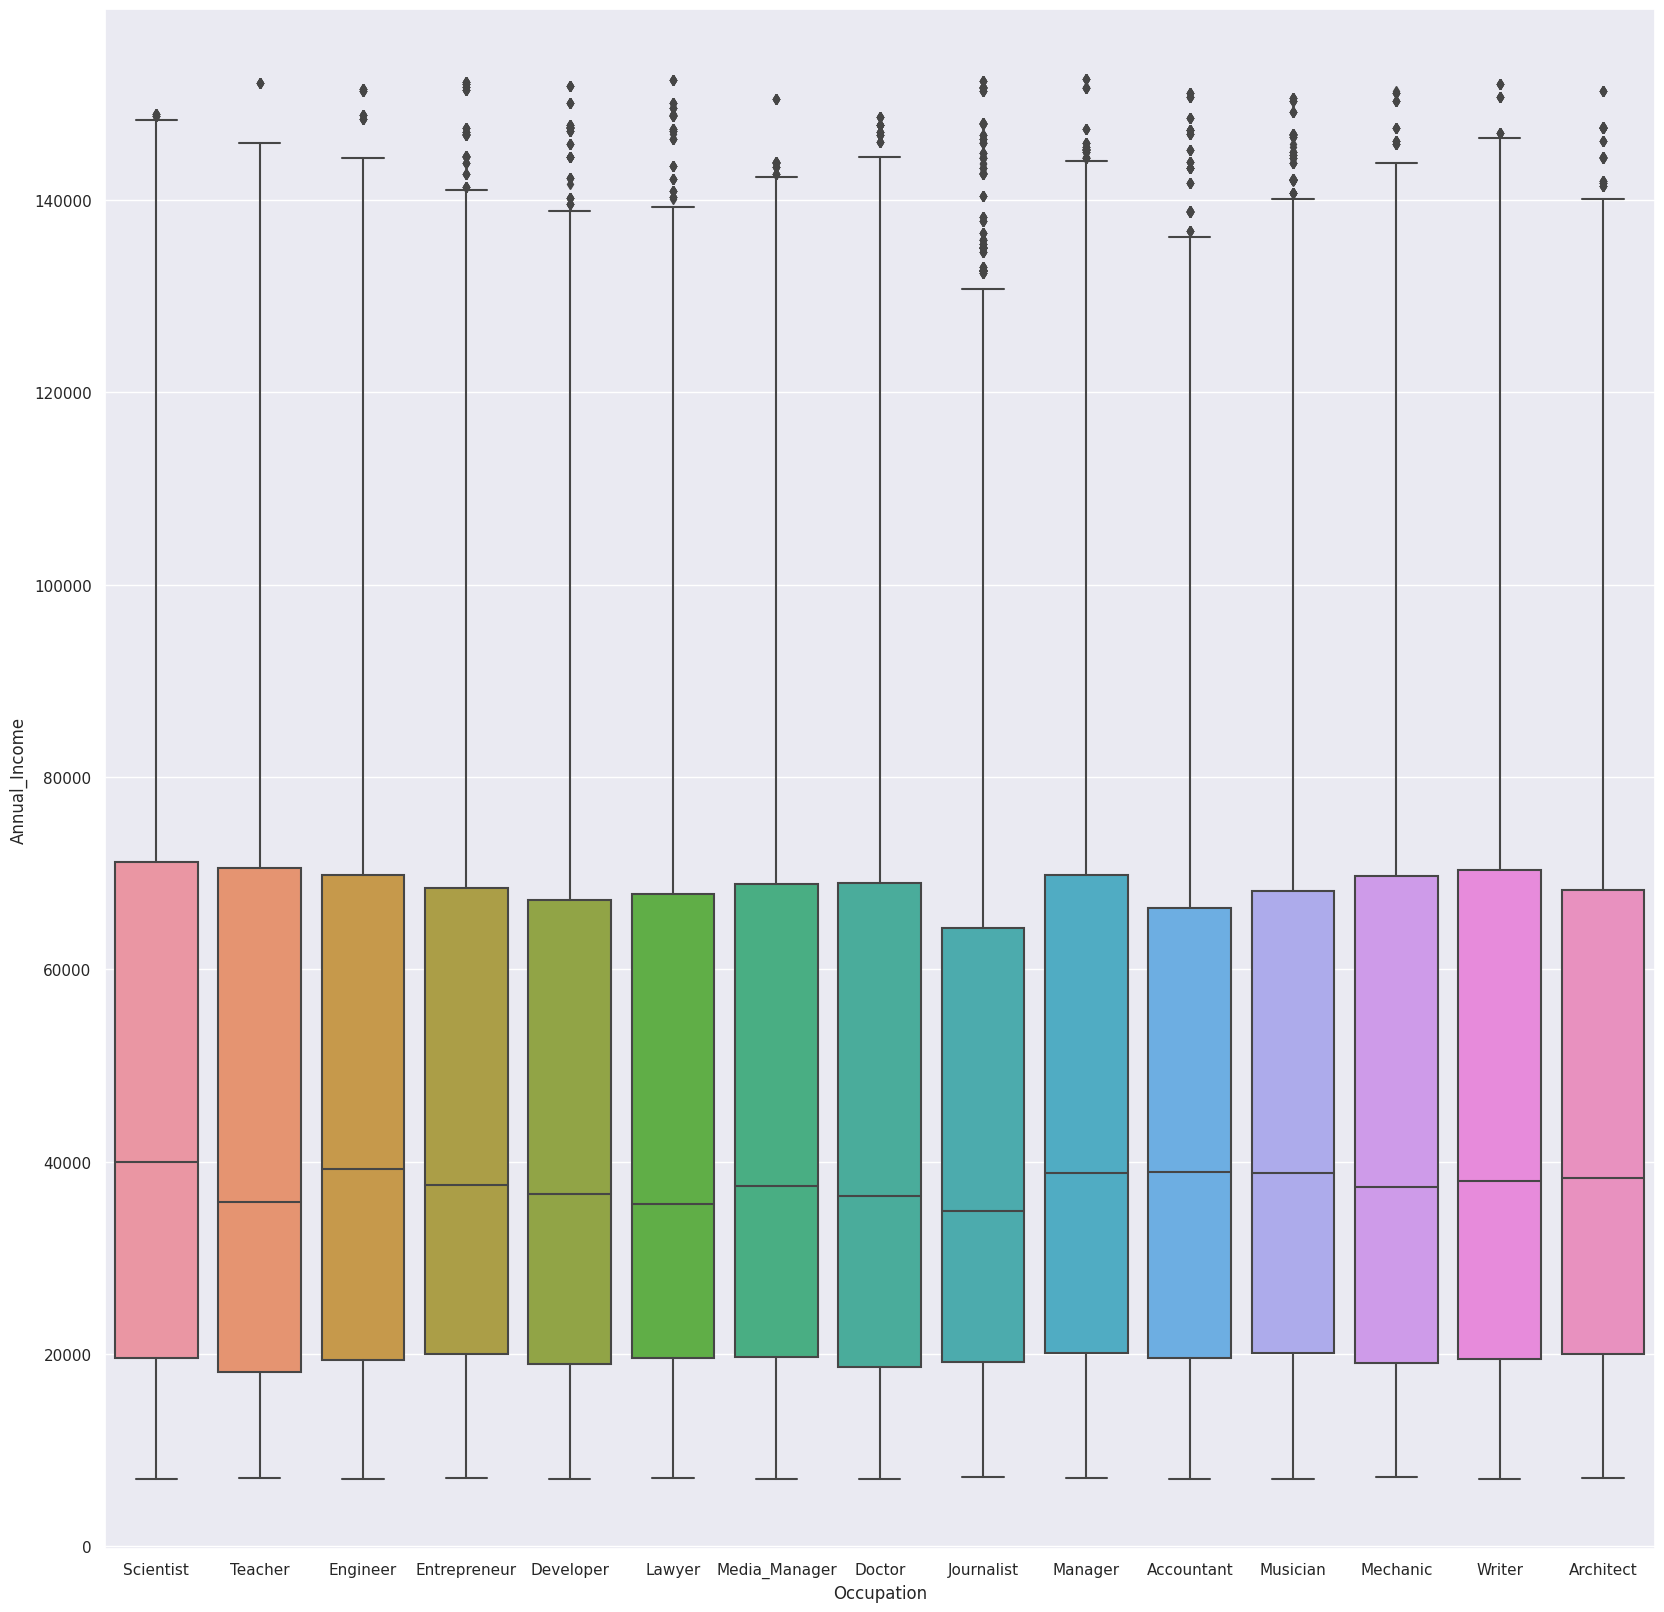

In [ ]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = df, x = 'Occupation', y = 'Annual_Income')
plt.show()

In [ ]:
#group by Payment_of_Min_Amount, Credit_Score
df.groupby(['Payment_of_Min_Amount'])['Credit_Score'].value_counts(normalize = True)

Payment_of_Min_Amount  Credit_Score
No                     Standard        0.492260
                       Good            0.333851
                       Poor            0.173889
Yes                    Standard        0.567710
                       Poor            0.395750
                       Good            0.036540
Name: Credit_Score, dtype: float64

In [ ]:
#group by Occupation, Credit_Score
df.groupby(['Occupation'])['Credit_Score'].value_counts(normalize = True)

Occupation     Credit_Score
Accountant     Standard        0.519929
               Poor            0.301674
               Good            0.178397
Architect      Standard        0.547710
               Poor            0.271139
               Good            0.181151
Developer      Standard        0.531867
               Poor            0.287624
               Good            0.180508
Doctor         Standard        0.548431
               Poor            0.275053
               Good            0.176515
Engineer       Standard        0.510136
               Poor            0.304798
               Good            0.185066
Entrepreneur   Standard        0.516444
               Poor            0.306653
               Good            0.176903
Journalist     Standard        0.527451
               Poor            0.281389
               Good            0.191161
Lawyer         Standard        0.545903
               Poor            0.276119
               Good            0.177978
Manager     

# Modelling

## Standardize data

In [ ]:
df.dtypes

ID                        object
Customer_ID              float64
Month                    float64
Age                      float64
Occupation                object
Annual_Income            float64
Monthly_Inhand_Salary    float64
Num_Bank_Accounts        float64
Num_Credit_Card          float64
Interest_Rate            float64
Num_of_Loan              float64
Delay_from_due_date      float64
Changed_Credit_Limit     float64
Outstanding_Debt          object
Credit_History_Age       float64
Payment_of_Min_Amount     object
Total_EMI_per_month      float64
Payment_Behaviour        float64
Monthly_Balance          float64
Credit_Score              object
dtype: object

In [ ]:
#Mã hóa dùng thư viện LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa LabelEncoder
cols = ['Total_EMI_per_month','Occupation','Payment_of_Min_Amount','Monthly_Balance'] # # Encode labels of multiple columns at once
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

## TRAIN TEST SPLIT 70-30

In [ ]:
X = df.iloc[:, 1:-1].values
X

array([[3392.0, 1.0, 23.0, ..., 3662, 4.0, 40782],
       [3392.0, 2.0, 23.0, ..., 3662, 3.0, 30116],
       [3392.0, 3.0, 33.32, ..., 3662, 2.0, 46909],
       ...,
       [37932.0, 6.0, 25.0, ..., 2347, 6.0, 1],
       [37932.0, 7.0, 25.0, ..., 2347, 3.0, 1],
       [37932.0, 8.0, 25.0, ..., 2347, 9.0, 1]], dtype=object)

In [ ]:
y = np.asanyarray(df['Credit_Score'])
y

array(['Good', 'Good', 'Good', ..., 'Poor', 'Standard', 'Poor'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split #Thư viện
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (70000, 18) (70000,)
Test set: (30000, 18) (30000,)


## DATA SCALING

In [ ]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
yhat = LR.predict(X_test)
yhat

array(['Poor', 'Poor', 'Standard', ..., 'Standard', 'Standard',
       'Standard'], dtype=object)

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.01796121, 0.52217136, 0.45986743],
       [0.01168895, 0.60165456, 0.38665648],
       [0.01706143, 0.43469705, 0.54824151],
       ...,
       [0.06258498, 0.32272608, 0.61468894],
       [0.24053596, 0.30897014, 0.4504939 ],
       [0.42774024, 0.0920908 , 0.48016895]])

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=['Good','Poor','Standard']))

[[  589    68  4670]
 [  121  3662  4900]
 [  446  2020 13524]]


In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

        Good       0.51      0.11      0.18      5327
        Poor       0.64      0.42      0.51      8683
    Standard       0.59      0.85      0.69     15990

    accuracy                           0.59     30000
   macro avg       0.58      0.46      0.46     30000
weighted avg       0.59      0.59      0.55     30000



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.5925

## N_BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

Confusion matrix, without normalization
[[4729  111  487]
 [1765 3979 2939]
 [6370 2583 7037]]


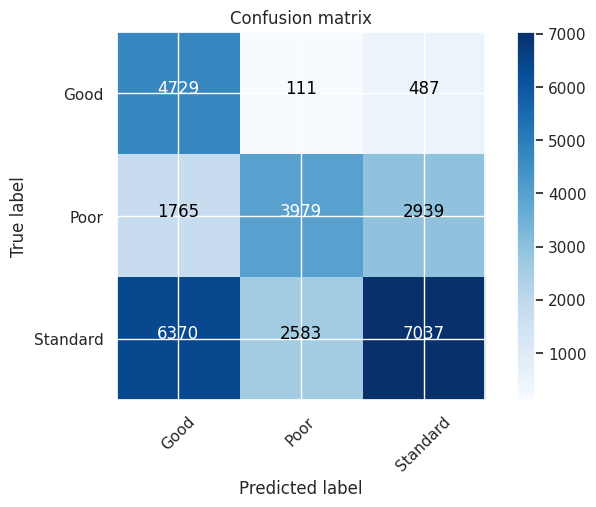

In [ ]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=['Good','Poor','Standard'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good','Poor','Standard'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5248333333333334

## DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)

In [ ]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
predTree = drugTree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

['Standard' 'Poor' 'Standard' 'Standard' 'Good']
['Standard' 'Poor' 'Poor' 'Good' 'Good']


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6636


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.994506 to fit



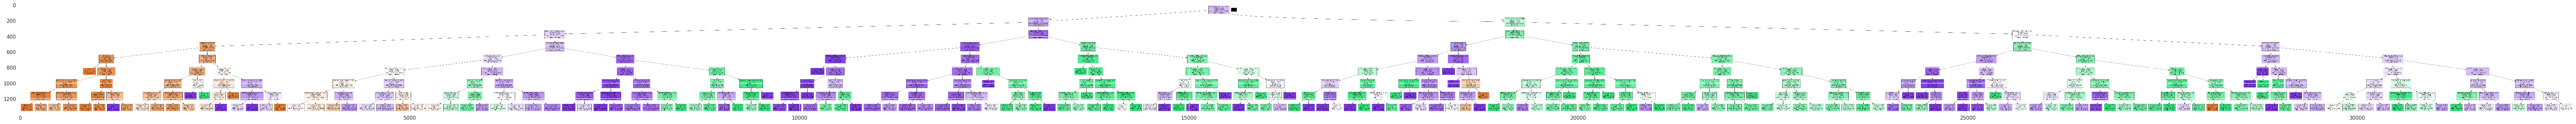

In [ ]:
#Visualize Tree
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:18]
targetNames = df["Credit_Score"].unique().tolist()
out=tree.export_graphviz(drugTree, feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_cm = confusion_matrix(y_test,rf_y_pred)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("confusion matrics=",rf_cm)
print("  ")
print("accuracy=",rf_accuracy)

confusion matrics= [[ 3879    22  1426]
 [  440  6667  1576]
 [ 1919  1688 12383]]
  
accuracy= 0.7643


Confusion matrix, without normalization
[[ 3879    22  1426]
 [  440  6667  1576]
 [ 1919  1688 12383]]


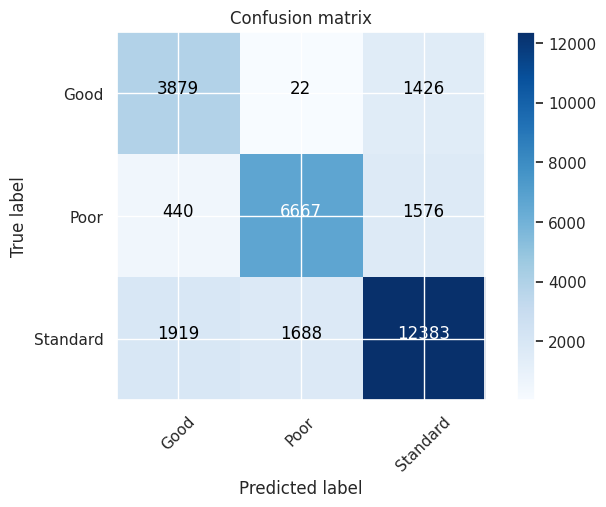

In [ ]:
plot_confusion_matrix(rf_cm, classes=['Good','Poor','Standard'], title='Confusion matrix')

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
metrics.accuracy_score(y_test, rf_y_pred)
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

        Good       0.62      0.73      0.67      5327
        Poor       0.80      0.77      0.78      8683
    Standard       0.80      0.77      0.79     15990

    accuracy                           0.76     30000
   macro avg       0.74      0.76      0.75     30000
weighted avg       0.77      0.76      0.77     30000



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.model_selection import GridSearchCV

In [ ]:
df_knn = df.drop(columns=['ID'])
df_knn

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392.0,1.0,23.00,12,19114.12,1824.843333,3.0,4.0,3.000,4.0,3.0,11.27,809.98,265.0,0,3662,4.0,40782,Good
1,3392.0,2.0,23.00,12,19114.12,4194.171000,3.0,4.0,3.000,4.0,-1.0,11.27,809.98,775.0,0,3662,3.0,30116,Good
2,3392.0,3.0,33.32,12,19114.12,4194.171000,3.0,4.0,3.000,4.0,3.0,21807.00,809.98,267.0,0,3662,2.0,46909,Good
3,3392.0,4.0,23.00,12,19114.12,4194.171000,3.0,4.0,3.000,4.0,5.0,6.27,809.98,268.0,0,3662,1.0,10566,Good
4,3392.0,5.0,23.00,12,19114.12,1824.843333,3.0,4.0,3.000,4.0,6.0,11.27,809.98,269.0,0,3662,5.0,50028,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932.0,4.0,25.00,9,39628.99,3359.415833,4.0,6.0,7.000,2.0,23.0,11.50,502.38,378.0,0,2347,6.0,1,Poor
99996,37932.0,5.0,25.00,9,39628.99,3359.415833,4.0,6.0,7.000,2.0,18.0,11.50,502.38,379.0,0,2347,5.0,1,Poor
99997,37932.0,6.0,25.00,9,39628.99,3359.415833,4.0,6.0,14.532,2.0,27.0,11.50,502.38,380.0,0,2347,6.0,1,Poor
99998,37932.0,7.0,25.00,9,39628.99,3359.415833,4.0,6.0,7.000,2.0,20.0,11.50,502.38,381.0,0,2347,3.0,1,Standard


In [ ]:
onehot= pd.get_dummies(df_knn['Credit_Score'])
df_knn = pd.concat([df_knn, onehot], axis=1)

In [ ]:
df_knn.drop(['Credit_Score'], axis=1, inplace=True)
df_knn

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Good,Poor,Standard
0,3392.0,1.0,23.00,12,19114.12,1824.843333,3.0,4.0,3.000,4.0,...,11.27,809.98,265.0,0,3662,4.0,40782,1,0,0
1,3392.0,2.0,23.00,12,19114.12,4194.171000,3.0,4.0,3.000,4.0,...,11.27,809.98,775.0,0,3662,3.0,30116,1,0,0
2,3392.0,3.0,33.32,12,19114.12,4194.171000,3.0,4.0,3.000,4.0,...,21807.00,809.98,267.0,0,3662,2.0,46909,1,0,0
3,3392.0,4.0,23.00,12,19114.12,4194.171000,3.0,4.0,3.000,4.0,...,6.27,809.98,268.0,0,3662,1.0,10566,1,0,0
4,3392.0,5.0,23.00,12,19114.12,1824.843333,3.0,4.0,3.000,4.0,...,11.27,809.98,269.0,0,3662,5.0,50028,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932.0,4.0,25.00,9,39628.99,3359.415833,4.0,6.0,7.000,2.0,...,11.50,502.38,378.0,0,2347,6.0,1,0,1,0
99996,37932.0,5.0,25.00,9,39628.99,3359.415833,4.0,6.0,7.000,2.0,...,11.50,502.38,379.0,0,2347,5.0,1,0,1,0
99997,37932.0,6.0,25.00,9,39628.99,3359.415833,4.0,6.0,14.532,2.0,...,11.50,502.38,380.0,0,2347,6.0,1,0,1,0
99998,37932.0,7.0,25.00,9,39628.99,3359.415833,4.0,6.0,7.000,2.0,...,11.50,502.38,381.0,0,2347,3.0,1,0,0,1


In [ ]:
classifier = KNeighborsClassifier(n_jobs=-1)
parameter = {
    'n_neighbors': range(1, 31, 2),
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2] # manhattan or euclidean
}

model = GridSearchCV(classifier,
                     param_grid=parameter,
                     cv=3,
                     n_jobs=1,
                     scoring='accuracy',
                     verbose=10)

model.fit(df_knn, y)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3; 1/60] START n_neighbors=1, p=1, weights=uniform........................
[CV 1/3; 1/60] END n_neighbors=1, p=1, weights=uniform;, score=0.469 total time= 1.2min
[CV 2/3; 1/60] START n_neighbors=1, p=1, weights=uniform........................
[CV 2/3; 1/60] END n_neighbors=1, p=1, weights=uniform;, score=0.472 total time= 1.3min
[CV 3/3; 1/60] START n_neighbors=1, p=1, weights=uniform........................
[CV 3/3; 1/60] END n_neighbors=1, p=1, weights=uniform;, score=0.474 total time= 1.2min
[CV 1/3; 2/60] START n_neighbors=1, p=1, weights=distance.......................
[CV 1/3; 2/60] END n_neighbors=1, p=1, weights=distance;, score=0.469 total time= 1.2min
[CV 2/3; 2/60] START n_neighbors=1, p=1, weights=distance.......................
[CV 2/3; 2/60] END n_neighbors=1, p=1, weights=distance;, score=0.472 total time= 1.2min
[CV 3/3; 2/60] START n_neighbors=1, p=1, weights=distance.......................
[CV 3/3; 2

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'n_neighbors': range(1, 31, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=10)

In [ ]:
model.best_params_

{'n_neighbors': 29, 'p': 1, 'weights': 'distance'}

In [ ]:
model.best_score_

0.5506699988101459

## Bagging classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bag = BaggingClassifier(LogisticRegression(),random_state=10)
bag.fit(X_train, y_train)
accuracy_bag = bag.score(X_test,y_test)
y_pred=bag.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print("Accuracy: {:.2f}".format(accuracy_bag))

Accuracy: 0.51


## XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(
    eval_metric="mlogloss",
    objective="multi:prob",
    use_label_encoder=False,
    max_depth=9,
    learning_rate=0.3,
    n_estimators=500,
)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [ ]:
xgb.score(X_train, y_train)

1.0

In [ ]:
ypred = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, ypred))

ValueError: ignored

## ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = adabClassifier(n_estimators=5, learning_rate=0.2)

In [ ]:
ada.fit(X_train , y_train)

In [ ]:
ada_score = ada.score(X_train,y_train )

In [ ]:
ada_score_t = ada.score(X_test , y_test)

In [ ]:
print("Accuracy: {:.2f}".format(ada_score_t))

# K-Mean Clustering

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
onehot= pd.get_dummies(df['Credit_Score'])
df_new = pd.concat([df, onehot], axis=1)

In [ ]:
df_new.drop(['Credit_Score'], axis=1, inplace=True)
df_new

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Good,Poor,Standard
0,0x1602,3392.0,1.0,23.00,12,19114.12,1824.843333,3.0,4.0,3.000,...,11.27,809.98,265.0,0,3662,4.0,40782,1,0,0
1,0x1603,3392.0,2.0,23.00,12,19114.12,4194.171000,3.0,4.0,3.000,...,11.27,809.98,775.0,0,3662,3.0,30116,1,0,0
2,0x1604,3392.0,3.0,33.32,12,19114.12,4194.171000,3.0,4.0,3.000,...,21807.00,809.98,267.0,0,3662,2.0,46909,1,0,0
3,0x1605,3392.0,4.0,23.00,12,19114.12,4194.171000,3.0,4.0,3.000,...,6.27,809.98,268.0,0,3662,1.0,10566,1,0,0
4,0x1606,3392.0,5.0,23.00,12,19114.12,1824.843333,3.0,4.0,3.000,...,11.27,809.98,269.0,0,3662,5.0,50028,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,37932.0,4.0,25.00,9,39628.99,3359.415833,4.0,6.0,7.000,...,11.50,502.38,378.0,0,2347,6.0,1,0,1,0
99996,0x25fea,37932.0,5.0,25.00,9,39628.99,3359.415833,4.0,6.0,7.000,...,11.50,502.38,379.0,0,2347,5.0,1,0,1,0
99997,0x25feb,37932.0,6.0,25.00,9,39628.99,3359.415833,4.0,6.0,14.532,...,11.50,502.38,380.0,0,2347,6.0,1,0,1,0
99998,0x25fec,37932.0,7.0,25.00,9,39628.99,3359.415833,4.0,6.0,7.000,...,11.50,502.38,381.0,0,2347,3.0,1,0,0,1


In [ ]:
#chọn biến X
X = df_new.iloc[:, 1:].values # Dữ liệu cho training. phân loại
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features

array([[-1.58e+00, -1.53e+00, -9.72e-01, ...,  2.15e+00, -6.39e-01,
        -1.07e+00],
       [-1.58e+00, -1.09e+00, -9.72e-01, ...,  2.15e+00, -6.39e-01,
        -1.07e+00],
       [-1.58e+00, -6.55e-01, -8.66e-07, ...,  2.15e+00, -6.39e-01,
        -1.07e+00],
       ...,
       [ 8.33e-01,  6.55e-01, -7.84e-01, ..., -4.66e-01,  1.56e+00,
        -1.07e+00],
       [ 8.33e-01,  1.09e+00, -7.84e-01, ..., -4.66e-01, -6.39e-01,
         9.38e-01],
       [ 8.33e-01,  1.53e+00, -7.84e-01, ..., -4.66e-01,  1.56e+00,
        -1.07e+00]])

In [ ]:
#1. Dùng elbow với giá trị SSE
kmeans_kwargs = {}
sse = [] #Tính toán giá trị SSE cho mỗi giá trị của k
for k in range(2, 20):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(scaled_features)
 sse.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

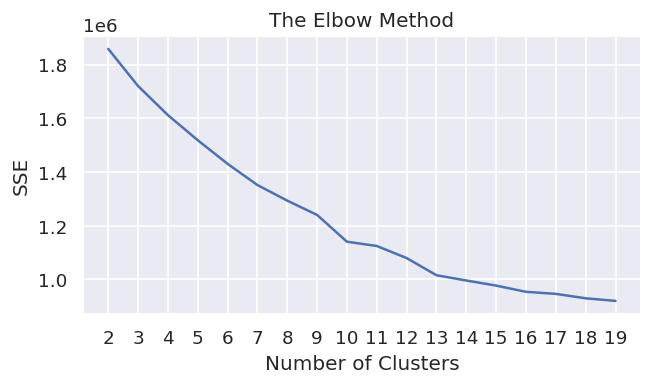

In [ ]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plt.plot(range(2, 20), sse)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.title('The Elbow Method')
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(2, 20), sse, curve="convex", direction="decreasing") #Tính toán, hiển thị ra giá trị elbow
kl.elbow

13

In [ ]:
#2. Dùng silhouette coefficients
silhouette_coefficients = []
for k in range(2, 20):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 score = silhouette_score(scaled_features, kmeans.labels_)
 silhouette_coefficients.append(score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

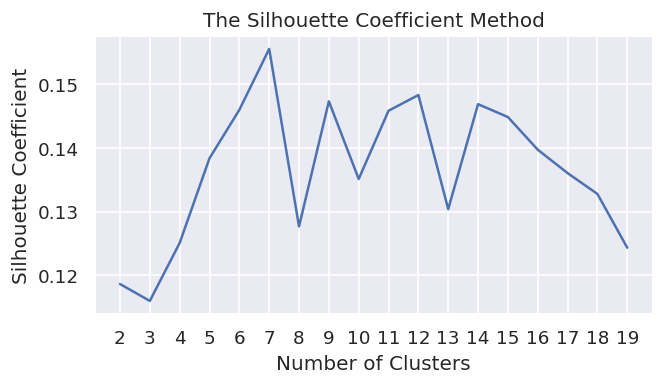

In [ ]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('The Silhouette Coefficient Method')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

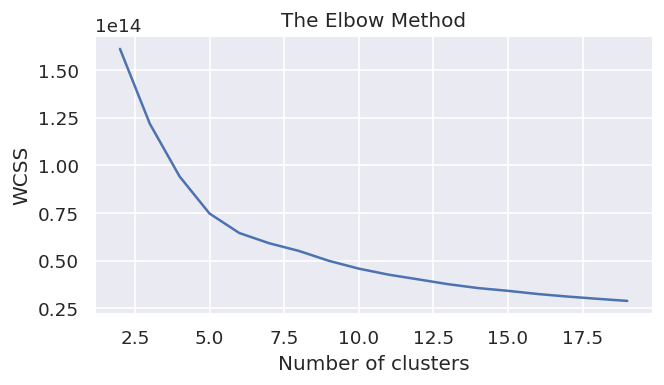

In [ ]:
#2. Dùng elbow với giá trị wcss
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kl = KneeLocator(range(2, 20), wcss, curve="convex", direction="decreasing") #Tính toán, hiển thị ra giá trị elbow
kl.elbow

6

In [ ]:
kmeans = KMeans(n_clusters = 6)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['Class']=y_pred    #Add thêm cột class vào bảng data

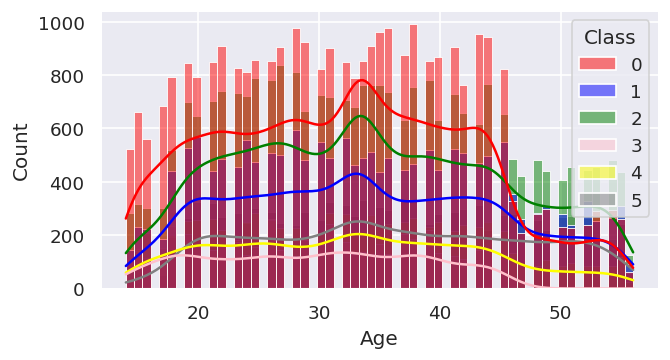

In [ ]:
import seaborn as sns
palette = ['red', 'blue','green','pink','yellow','gray']
sns.histplot(x='Age',hue= 'Class', data= df, palette=palette, kde=True);

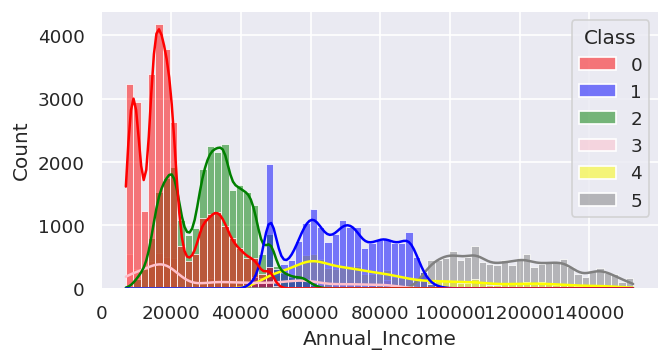

In [ ]:
import seaborn as sns
palette = ['red', 'blue','green','pink','yellow','gray']
sns.histplot(x='Annual_Income',hue= 'Class', data= df, palette=palette, kde=True);

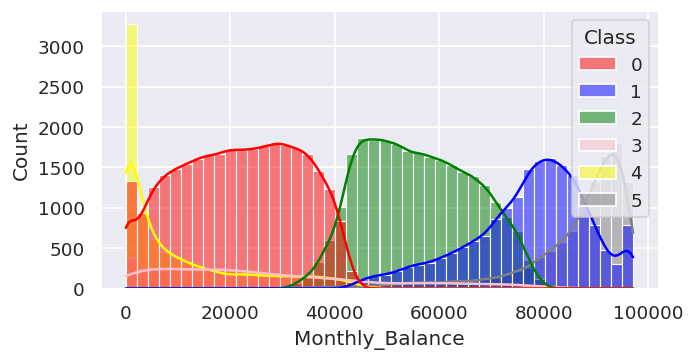

In [ ]:
import seaborn as sns
palette = ['red', 'blue','green','pink','yellow','gray']
sns.histplot(x='Monthly_Balance',hue= 'Class', data= df, palette=palette, kde=True);